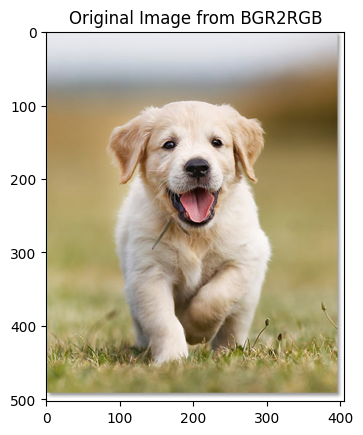

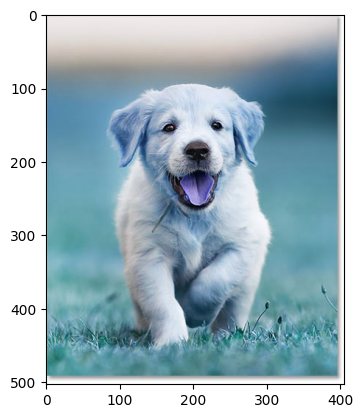

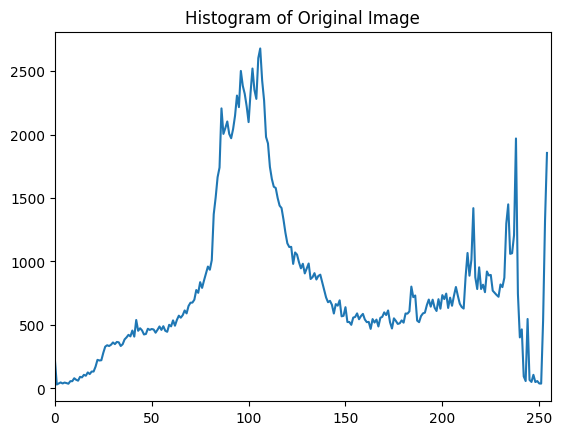

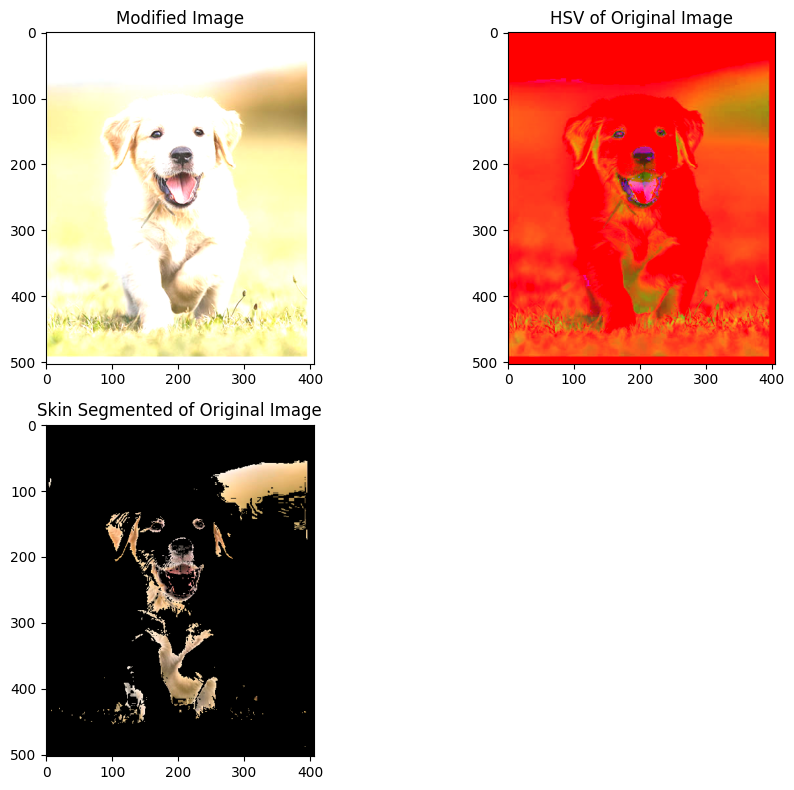

In [249]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = '../Lib/image.jpg'  # Replace with the path to your face image
original_image = cv2.imread(image_path)

img1=cv2.imread('../Lib/image.jpg',1)
img2=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.title("Original Image from BGR2RGB")
plt.imshow(img2)
plt.show()

img=cv2.imread("../Lib/image.jpg",1)
plt.imshow(img)
plt.show()

# Step 2: Create a histogram of the whole image
hist_original = cv2.calcHist([original_image], [0], None, [255], [0, 256])
plt.plot(hist_original)
plt.xlim([0,256])
plt.title('Histogram of Original Image')

# Step 3: Modify image to fill the complete tonal range (adjust brightness and contrast)
def modify_contrast_brightness(image, alpha, beta):
    modified_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return modified_image

alpha = 1.5  # Adjust the contrast factor
beta = 40   # Adjust the brightness factor
modified_image = modify_contrast_brightness(original_image, alpha, beta)


# Step 4: Create a mask of your face (You will need to manually create or obtain this mask)
face_mask = cv2.imread('../Lib/image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 5: Use the mask to create an HSV histogram
hsv_image = cv2.cvtColor(modified_image, cv2.COLOR_BGR2HSV)
hist_hsv = cv2.calcHist([hsv_image], [0, 1], face_mask, [180, 256], [0, 180, 0, 256])

# Step 6: Analyze the HSV histogram for skin tone ranges (You can determine these ranges manually)

# Define lower and upper bounds for skin tone in HSV
lower_skin = np.array([0, 20, 70],dtype=np.uint8)
upper_skin = np.array([20, 255, 255],dtype=np.uint8)
# Step 7: Create a mask of skin tones using inRange
skin_mask = cv2.inRange(hsv_image, lower_skin, upper_skin)

# Step 8: Apply the skin tone mask to segment out your skin/face
skin_segmented_image = cv2.bitwise_and(modified_image, modified_image, mask=skin_mask)

# Step 9: Display the results
plt.figure(figsize=(14, 8))
# plt.subplot(231), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
# plt.subplot(231), plt.plot(hist_original), plt.title('Histogram of Original Image')
plt.subplot(231), plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB)), plt.title('Modified Image')
# plt.subplot(235), plt.imshow(face_mask, cmap='gray'), plt.title('Face Mask')
# plt.subplot(235), plt.plot(hist_hsv), plt.title('Histogram of HSV Image')

# plt.subplot(236),plt.plot(adjusted_hist),plt.xlim([0,255])
plt.subplot(232), plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_BGR2RGB)), plt.title('HSV of Original Image')
plt.subplot(234), plt.imshow(cv2.cvtColor(skin_segmented_image, cv2.COLOR_BGR2RGB)), plt.title('Skin Segmented of Original Image')

plt.tight_layout()
plt.show()

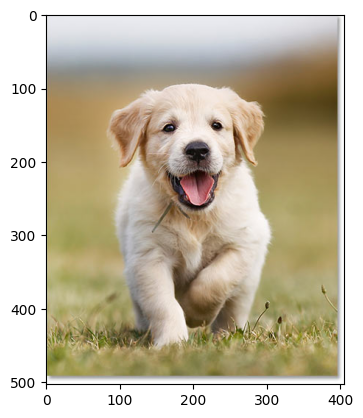

In [250]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import an image
img = cv2.imread("../Lib/image.jpg")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Let's do the conversion in imshow
plt.imshow(img)


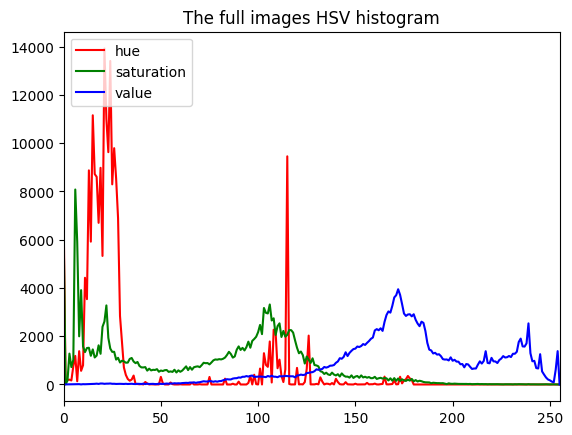

In [251]:
# Convert to HSV
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Create a histogram of HSV values.

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.title('The full images HSV histogram')
plt.show()



In [252]:
def rgb_to_hsv_pixel(img):
    #Height of image array
    h = img.shape[0]
    #width of image array
    w = img.shape[1]
    #channel of of image array
    d = img.shape[2]

    imghsv = np.zeros((h,w,d), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            #Reshaping 1D to 3D and send it to the rgb_to_hsv function
            imghsv[y][x]=rgb_to_hsv([[img[y][x]]])
    return imghsv

In [253]:
def bgr_to_rgb_pixel(img):
   #Height of image array
    h = img.shape[0]
    #width of image array
    w = img.shape[1]
    #channel of of image array
    d = img.shape[2]

    imgrgb = np.zeros((h,w,d), dtype=np.uint8)
    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            #Swapping red channel to blue and blue to red
            imgrgb[y][x][0]=img[y][x][2]
            imgrgb[y][x][1]=img[y][x][1]
            imgrgb[y][x][2]=img[y][x][0]
    return imgrgb

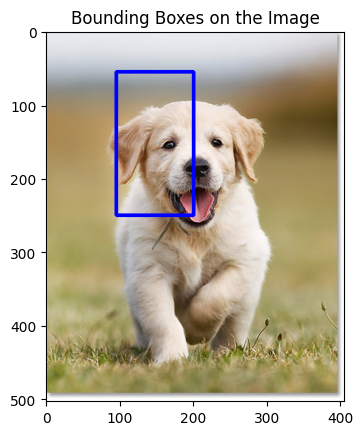

In [254]:
# Rectangle OpenCv function
# Import Image
img = cv2.imread('../Lib/image.jpg')

# Top left corner of rectangle
top_left=(95,55)

# Bottom right corner of rectangle
bottom_right=(200,250)

#Color of rectangle
rect_color =(255,0,0)

#Thickness
thickness=3

# Applying the rectangle function
img_rect=cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)

# Convert back to RGB
img_rect=bgr_to_rgb_pixel(img_rect)

# Plot image.
plt.title('Bounding Boxes on the Image')

plt.imshow(img_rect)

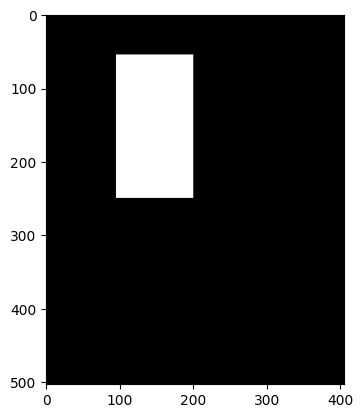

In [255]:
#create mask
mask= np.zeros(img.shape[:2], np.uint8)

#add white portion of the mask
mask[55:250, 95:200]=255


# Plot mask.
plt.imshow(mask, cmap="gray")

#img_masked = cv2.bitwise_and(img, img, mask=mask)
#plt.imshow(img_masked)

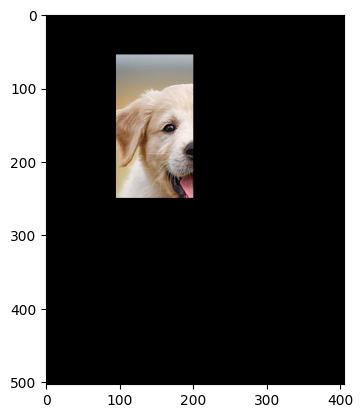

In [256]:
# Let's add our mask to our image.

# Import the face image again.
img = cv2.imread("../Lib/image.jpg")

# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# The bitwise AND operator ( & ) compares each bit of the first operand to the corresponding bit of the second operand. 
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the corresponding result bit is set to 0. 
# First image to compare.  Second image to compare.  Mask to use. 
img_masked = cv2.bitwise_and(img, img, mask=mask)

# Plot the masked image.

plt.imshow(img_masked)

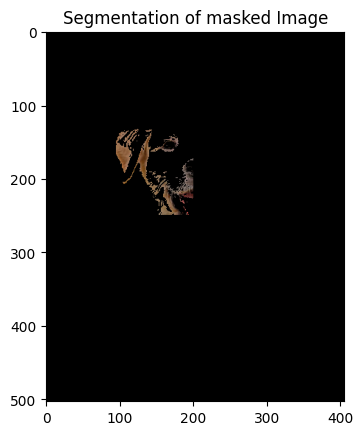

In [257]:
min_hsv = np.array([0, 20, 70],dtype=np.uint8)
max_hsv = np.array([20, 255, 255],dtype=np.uint8)


skinArea = cv2.inRange(hsv_image, min_hsv, max_hsv)

skinHsv = cv2.bitwise_and(img_masked, img_masked, mask = skinArea)

plt.title('Segmentation of masked Image')
plt.imshow(skinHsv)

In [258]:
img = cv2.imread('../Lib/image.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

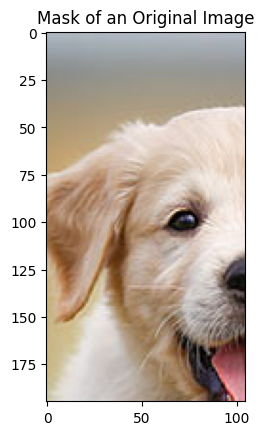

In [259]:
img_masked = img[55:250, 95:200]
plt.title('Mask of an Original Image')
plt.imshow(img_masked)

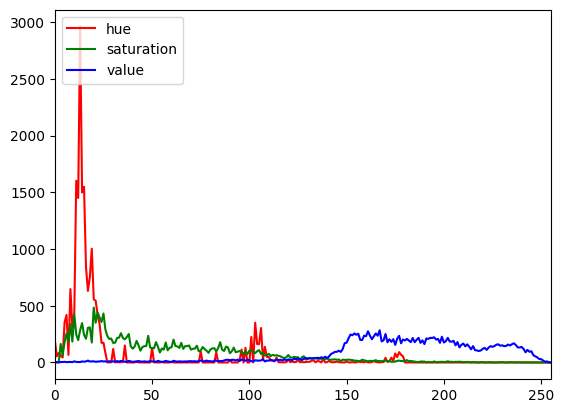

In [260]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)


# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')

# Plot a histogram.
plt.show()